In [1]:
# Libaries

import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Yellowbirck
from yellowbrick.cluster import KElbowVisualizer

import folium 

In [2]:
data_sample = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week8\Project_8\data\data_sample_labeled.csv')

### Data analysis

Adding columns, calculating parameters in order to show them on the graph later 

In [3]:
data_sample.shape

(65243, 11)

In [4]:
data_sample.drop(columns='Unnamed: 0', inplace=True)

In [5]:
data_sample.head()

,Date/Time,Lat,Lon,Base,labels_kmeans,ag_labels,mean_shift_label,optic_labels,dbscan_label,dbscan_label2
0,2014-05-14 23:52:00,40.7243,-73.9933,B02682,0,0,0,-1,0,0
1,2014-05-23 08:01:00,40.7650,-73.9613,B02598,1,2,0,-1,0,0
2,2014-05-23 18:41:00,40.7210,-74.0100,B02682,0,0,0,1564,0,0
3,2014-05-02 21:55:00,40.7191,-73.9897,B02682,0,0,0,-1,0,0
4,2014-05-21 22:18:00,40.7461,-74.0053,B02682,0,0,0,2218,0,0


In [6]:
data_sample.dtypes

Date/Time            object
Lat                 float64
Lon                 float64
Base                 object
labels_kmeans         int64
ag_labels             int64
mean_shift_label      int64
optic_labels          int64
dbscan_label          int64
dbscan_label2         int64
dtype: object

In [7]:
#We need to convert date and time to date time object in order to substract from it hour, days of week etc.
data_sample['Date/Time'] =pd.to_datetime(data_sample['Date/Time'])

In [8]:
#Adding column with hour
data_sample['hour'] =data_sample['Date/Time'].dt.hour

In [9]:
#Adding column with day of week
data_sample['day_of_week'] =data_sample['Date/Time'].dt.day_name()

In [10]:
#Column with the number of a day
data_sample['day_Week_num'] = data_sample['Date/Time'].dt.dayofweek

In [11]:
#Adding a column with the number of a week in a year
data_sample['week'] = data_sample['Date/Time'].dt.week

C:\Users\radek\AppData\Local\Temp/ipykernel_19044/3752800835.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data_sample['week'] = data_sample['Date/Time'].dt.week


In [12]:
#Adding column with time od day, basing on the hour
data_sample['time_of_day']= pd.cut(data_sample['hour'], bins=[-1,6,10,14,18,24], labels=['night','morning', 'noon', 'afternoon', 'evening'])

In [13]:
data_sample.head()

,Date/Time,Lat,Lon,Base,labels_kmeans,ag_labels,mean_shift_label,optic_labels,dbscan_label,dbscan_label2,hour,day_of_week,day_Week_num,week,time_of_day
0,2014-05-14 23:52:00,40.7243,-73.9933,B02682,0,0,0,-1,0,0,23,Wednesday,2,20,evening
1,2014-05-23 08:01:00,40.7650,-73.9613,B02598,1,2,0,-1,0,0,8,Friday,4,21,morning
2,2014-05-23 18:41:00,40.7210,-74.0100,B02682,0,0,0,1564,0,0,18,Friday,4,21,afternoon
3,2014-05-02 21:55:00,40.7191,-73.9897,B02682,0,0,0,-1,0,0,21,Friday,4,18,evening
4,2014-05-21 22:18:00,40.7461,-74.0053,B02682,0,0,0,2218,0,0,22,Wednesday,2,21,evening


In [14]:
data_sample.isna().sum()

Date/Time           0
Lat                 0
Lon                 0
Base                0
labels_kmeans       0
ag_labels           0
mean_shift_label    0
optic_labels        0
dbscan_label        0
dbscan_label2       0
hour                0
day_of_week         0
day_Week_num        0
week                0
time_of_day         0
dtype: int64

## GRAPHS

### Map showing claster center by hour and day 

Since this approach was not the best as for example center of one cluster was in the river, we dicided to proceed with other map. 

In [15]:
hour = 12 
day = 'Monday'

In [16]:
data_map = data_sample.loc[(data_sample['hour']==hour) & (data_sample['day_of_week']==day)]

circle_sizes = data_map.groupby('labels_kmeans')['day_of_week'].agg('count')

In [17]:
#Size of a circle marker in the claster was depedent on the number of pickups in that location on certain day and time
size1 =int((circle_sizes[0]/(circle_sizes[0]+circle_sizes[1]+circle_sizes[2]+circle_sizes[3]+circle_sizes[4]))*100)
size2 =int((circle_sizes[1]/(circle_sizes[0]+circle_sizes[1]+circle_sizes[2]+circle_sizes[3]+circle_sizes[4]))*100)
size3=int((circle_sizes[2]/(circle_sizes[0]+circle_sizes[1]+circle_sizes[2]+circle_sizes[3]+circle_sizes[4]))*100)
size4 =int((circle_sizes[3]/(circle_sizes[0]+circle_sizes[1]+circle_sizes[2]+circle_sizes[3]+circle_sizes[4]))*100)
size5 =int((circle_sizes[4]/(circle_sizes[0]+circle_sizes[1]+circle_sizes[2]+circle_sizes[3]+circle_sizes[4]))*100)


In [18]:

#create map
m= folium.Map(location=[40.7128, -74.0060], zoom_start=11,tiles = "Stamen Toner")

#create markers
folium.CircleMarker(
    location=[40.79440428, -73.87535242],
    radius = size1,
    popup="Mt. Hood Meadows",
    icon=folium.Icon(icon="cloud"),
).add_to(m)

folium.CircleMarker(
    location=[40.71874444, -73.99146381],
    popup="Timberline Lodge",
    radius = size2,
    icon=folium.Icon(color="green"),
).add_to(m)

folium.CircleMarker(
    location=[40.66078976, -73.7722059],
    radius = size3,
    popup="Some Other Location",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
folium.CircleMarker(
    location=[40.7632614 , -73.97596349],
    radius = size4,
    popup="Some Other Location",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)
folium.CircleMarker(
    location=[ 40.69597311, -74.2047221],
    radius = size5,
    popup="Some Other Location",
    icon=folium.Icon(color="red", icon="info-sign"),
).add_to(m)


# m.save('map.html')
m

### Map showing pickup locations at selected day and hour by cluster

In [19]:
data_map = data_sample.loc[(data_sample['hour']==hour) & (data_sample['day_of_week']==day)]

In [20]:
data_map_list_cluster1 = data_map[['Lat','Lon']][data_map['labels_kmeans']==0].values.tolist()
data_map_list_cluster2 = data_map[['Lat','Lon']][data_map['labels_kmeans']==1].values.tolist()
data_map_list_cluster3 = data_map[['Lat','Lon']][data_map['labels_kmeans']==2].values.tolist()
data_map_list_cluster4 = data_map[['Lat','Lon']][data_map['labels_kmeans']==3].values.tolist()
data_map_list_cluster5 = data_map[['Lat','Lon']][data_map['labels_kmeans']==4].values.tolist()
size_map_list_1 = len(data_map_list_cluster1)
size_map_list_2 = len(data_map_list_cluster2)
size_map_list_3 = len(data_map_list_cluster3)
size_map_list_4 = len(data_map_list_cluster4)
size_map_list_5 = len(data_map_list_cluster5)


In [21]:
m_p= folium.Map(location=[40.7128, -74.0060], zoom_start=10,tiles = "Stamen Toner")


#first cluster
for point in range(0,size_map_list_1):
	folium.CircleMarker(data_map_list_cluster1[point], radius=2,color='blue',fill_color='lightblue',).add_to(m_p)

#second claster
for point in range(0,size_map_list_2):
	folium.CircleMarker(data_map_list_cluster2[point], radius=2,color='green',fill_color='lightgreen',).add_to(m_p)

#third claster
for point in range(0,size_map_list_3):
	folium.CircleMarker(data_map_list_cluster3[point], radius=2,color='purple',fill_color='purple',).add_to(m_p)

#fourth claster
for point in range(0,size_map_list_4):
	folium.CircleMarker(data_map_list_cluster4[point], radius=2,color='orange',fill_color='orange',).add_to(m_p)

#fifth claster
for point in range(0,size_map_list_5):
	folium.CircleMarker(data_map_list_cluster5[point], radius=2,color='red',fill_color='red',).add_to(m_p)


m_p


### Map showing all pickup locations by cluster

In [22]:
data_map_list_cluster1 = data_sample[['Lat','Lon']][data_sample['labels_kmeans']==0].values.tolist()
data_map_list_cluster2 = data_sample[['Lat','Lon']][data_sample['labels_kmeans']==1].values.tolist()
data_map_list_cluster3 = data_sample[['Lat','Lon']][data_sample['labels_kmeans']==2].values.tolist()
data_map_list_cluster4 = data_sample[['Lat','Lon']][data_sample['labels_kmeans']==3].values.tolist()
data_map_list_cluster5 = data_sample[['Lat','Lon']][data_sample['labels_kmeans']==4].values.tolist()
size_map_list_1 = len(data_map_list_cluster1)
size_map_list_2 = len(data_map_list_cluster2)
size_map_list_3 = len(data_map_list_cluster3)
size_map_list_4 = len(data_map_list_cluster4)
size_map_list_5 = len(data_map_list_cluster5)

In [32]:
m_p= folium.Map(location=[40.7128, -74.0060], zoom_start=10,tiles = "Stamen Toner")


#first cluster
for point in range(0,size_map_list_1):
	folium.CircleMarker(data_map_list_cluster1[point], radius=2,color='blue',fill_color='lightblue',).add_to(m_p)

#second claster
for point in range(0,size_map_list_2):
	folium.CircleMarker(data_map_list_cluster2[point], radius=2,color='green',fill_color='lightgreen',).add_to(m_p)

#third claster
for point in range(0,size_map_list_3):
	folium.CircleMarker(data_map_list_cluster3[point], radius=2,color='purple',fill_color='purple',).add_to(m_p)

#fourth claster
for point in range(0,size_map_list_4):
	folium.CircleMarker(data_map_list_cluster4[point], radius=2,color='orange',fill_color='orange',).add_to(m_p)

#fifth claster
for point in range(0,size_map_list_5):
	folium.CircleMarker(data_map_list_cluster5[point], radius=2,color='red',fill_color='red',).add_to(m_p)


# m_p


### Pie chart to show the rides per time of day 

In [24]:
data_time = data_sample.groupby('time_of_day')['week'].agg('count')
data_time = pd.DataFrame(data_time)
data_time

,week
time_of_day,
night,7312
morning,9220
noon,10826
afternoon,19296
evening,18589


In [25]:

fig = px.pie(data_frame=data_time, values="week", names=data_time.index,color_discrete_sequence=px.colors.sequential.RdBu_r)
fig.show()

### Graph to show the average number of rides per day 

In [26]:
ride = data_sample.groupby(['week','hour','day_of_week', 'day_Week_num'])['Base'].count()
ride = ride.reset_index()
ride = ride.rename(columns = {'Base':'Ride'})
ride.sort_values('Ride')
ride.head()

,week,hour,day_of_week,day_Week_num,Ride
0,18,0,Friday,4,36
1,18,0,Saturday,5,78
2,18,0,Sunday,6,125
3,18,0,Thursday,3,34
4,18,1,Friday,4,22


In [27]:
# groupby operation
avg_wk = ride.groupby(['day_of_week','hour'])['Ride'].agg('mean')
avg_wk = pd.DataFrame(avg_wk)
avg_wk = avg_wk.reset_index() 
avg_wk


,day_of_week,hour,Ride
0,Friday,0,42.00
1,Friday,1,24.20
2,Friday,2,17.40
3,Friday,3,18.80
4,Friday,4,26.20
...,...,...,...
163,Wednesday,19,150.75
164,Wednesday,20,150.00
165,Wednesday,21,137.25
166,Wednesday,22,96.50


In [28]:
fig = px.line(avg_wk, x="hour", y="Ride", color='day_of_week', markers=True, color_discrete_sequence=px.colors.sequential.RdBu_r, title='Average number of rides per day and hour',
labels=dict(day_of_week="Day of week", Ride="Averge number of rides", hour='Hour, h'))
fig.show()

In [29]:
px.line

<function plotly.express._chart_types.line(data_frame=None, x=None, y=None, line_group=None, color=None, line_dash=None, symbol=None, hover_name=None, hover_data=None, custom_data=None, text=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, error_x=None, error_x_minus=None, error_y=None, error_y_minus=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, orientation=None, color_discrete_sequence=None, color_discrete_map=None, line_dash_sequence=None, line_dash_map=None, symbol_sequence=None, symbol_map=None, markers=False, log_x=False, log_y=False, range_x=None, range_y=None, line_shape=None, render_mode='auto', title=None, template=None, width=None, height=None)>

In [30]:
avg_wk['AverageRides'] = avg_wk['AverageRides'].astype('int')
avg_wk['AverageRides'].dtypes

KeyError: 'AverageRides'

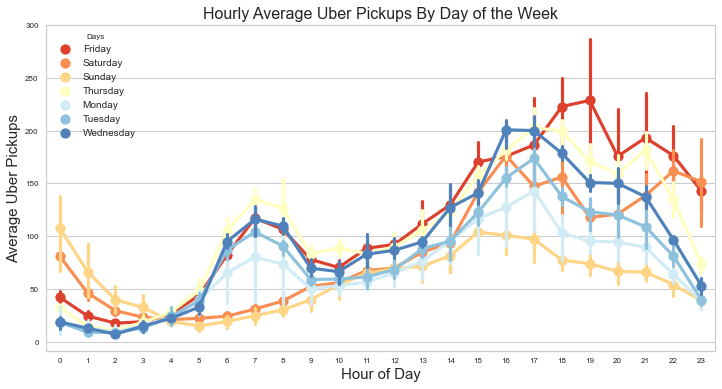

In [ ]:
##create figure
fig = plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
ax = sns.pointplot(x="hour", y="AverageRides", hue="day_of_week", data=avg_wk, palette='RdYlBu')
handles,labels = ax.get_legend_handles_labels()
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_xlabel('Hour of Day', fontsize = 15)
ax.set_ylabel('Average Uber Pickups', fontsize = 15)
ax.set_title('Hourly Average Uber Pickups By Day of the Week', fontsize=16)
ax.tick_params(labelsize = 8)
ax.legend(handles,labels,loc=0, title="Days", prop={'size':10})
ax.get_legend().get_title().set_fontsize('8')
plt.show()



### Metrics 

total numer of rides in may 

In [ ]:
data = pd.read_csv(r'C:\Users\radek\IronHack\IronRadek\Week8\Project_8\data\uber-raw-data-may14.csv')

In [ ]:
data.head()

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512
2,5/1/2014 0:15:00,40.7464,-73.9838,B02512
3,5/1/2014 0:17:00,40.7463,-74.0011,B02512
4,5/1/2014 0:17:00,40.7594,-73.9734,B02512


In [ ]:
data['Date/Time'] =pd.to_datetime(data['Date/Time'])

In [ ]:
#Adding column with hour
data['hour'] =data['Date/Time'].dt.hour

In [ ]:
data['day_of_week'] =data['Date/Time'].dt.day_name()
#Column with the number of a day
data['day_Week_num'] = data['Date/Time'].dt.dayofweek
#Adding a column with the number of a week in a year
data['week'] = data['Date/Time'].dt.week

C:\Users\radek\AppData\Local\Temp/ipykernel_7996/2629243845.py:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [ ]:
data.head()

,Date/Time,Lat,Lon,Base,hour,day_of_week,day_Week_num,week
0,2014-05-01 00:02:00,40.7521,-73.9914,B02512,0,Thursday,3,18
1,2014-05-01 00:06:00,40.6965,-73.9715,B02512,0,Thursday,3,18
2,2014-05-01 00:15:00,40.7464,-73.9838,B02512,0,Thursday,3,18
3,2014-05-01 00:17:00,40.7463,-74.0011,B02512,0,Thursday,3,18
4,2014-05-01 00:17:00,40.7594,-73.9734,B02512,0,Thursday,3,18


In [ ]:
n_rides= data['hour'].count()
n_rides

652435

In [ ]:
n_rides

652435

Average number of rides per day

In [ ]:
data['date']= data['Date/Time'].dt.date

In [ ]:
rides_per_day = data.groupby('date')['hour'].agg('count')

In [ ]:
av_rides_per_day = int(np.mean(rides_per_day))
av_rides_per_day

21046

In [ ]:
hour = 11
data_hour= data.loc[(data['hour']==hour)]
data_hour.groupby(['day_of_week','hour'])['week'].agg('count').sort_values()

day_of_week  hour
Monday       11      2297
Sunday       11      2509
Tuesday      11      2554
Wednesday    11      2961
Saturday     11      3248
Thursday     11      4236
Friday       11      4250
Name: week, dtype: int64

In [ ]:
data_hour = data.loc[(data['hour']==hour)]
fig = px.histogram(data_hour, x= data_hour['day_of_week'], color='day_of_week',color_discrete_sequence=px.colors.sequential.RdBu,
title="Total number of rides per day and hour",
labels=dict(day_of_week="Day of week", count="Count"))
fig.show()